In [278]:
import numpy as np
import pandas as pd
import datetime
import time
from matplotlib import pyplot as plt
import os

### Data Gathering

In [83]:
metro_city = ['Atlanta', 'Boston', 'Cleveland', 'Chicago', 'Charlotte', 'Dallas', 'Detroit', 'Denver', 'Las Vegas', 'Los Angelos', 'Miami', 'Minneapolis', 'New York','Phoenix','Portland','San Diego','Seattle','San Francisco','Tampa','Washington']
states_ls = ['Arizona', 'California','Colorado', 'District of Columbia','Florida','Georgia','Illinois','Massachusetts','Michigan','Minnesota','Nevada','New York','North Carolina','Ohio','Oregon','Texas','Washington']
states_abbrev = ['AZ', 'CA', 'CO', 'DC', 'FL', 'GA', 'IL', 'MA', 'MI', 'MN', 'NV', 'NY', 'NC', 'OH', 'OR', 'TX', 'WA']

### Part 1

●	State level historical house prices on Quandl since 1970 gathered by FMHPI. Make sure you understand the methodology in constructing this dataset. Is seasonality removed? How are prices aggregated?

### The data is downloaded from https://www.quandl.com/data/FMAC/HPI-House-Price-Index-All-States-and-US-National

In [134]:
FMHPI = pd.read_csv("/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ FMHPI/FMAC-HPI.csv", dtype={'Date': str}, index_col = 0)
FMHPI

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,TX,UT,VA,VT,WA,WI,WV,WY,United States not seasonaly adjusted,United States seasonaly adjusted
Date,,,,,,,,,,,,,,,,,,,,,
2017-12-31,180.140002,138.465286,143.535720,185.932453,224.416791,191.251430,136.368886,342.175252,158.169789,205.362563,...,191.614575,187.437632,185.522033,175.676196,220.553276,140.521333,147.220398,193.557479,179.339626,180.312876
2017-11-30,180.191092,137.905915,143.715639,185.808730,223.476329,190.468198,137.029819,341.367593,159.215701,205.148540,...,191.157777,186.978663,186.309152,175.451073,219.358413,141.158985,147.220056,193.252544,179.252146,179.252467
2017-10-31,180.642452,137.690921,143.815618,185.386919,223.013716,189.973594,137.688445,341.131417,160.357290,204.961848,...,191.001095,186.565591,186.848096,175.438235,218.375552,141.524015,146.961577,192.746245,179.214015,178.174761
2017-09-30,180.863076,137.182469,143.810889,185.082101,222.747758,189.247183,138.345405,342.079384,161.214510,204.479775,...,190.747517,186.219039,187.473673,175.630815,217.666449,141.704092,147.000202,192.303711,179.195171,177.150321
2017-08-31,180.767705,136.832464,143.883305,184.653324,221.827303,188.890036,138.899318,344.007270,161.484105,203.032387,...,190.405956,185.766048,188.244928,175.997419,217.172701,141.929765,147.276040,192.013542,178.982525,176.095178
2017-07-31,180.471912,137.053164,143.620062,183.518737,220.488530,188.574935,138.958521,345.818652,160.924917,201.176755,...,190.183635,184.835160,188.568619,175.832939,216.832218,141.917765,147.406003,191.768876,178.430602,175.085220
2017-06-30,179.910454,137.306662,142.714169,182.145258,219.143801,187.490550,138.088309,346.407731,159.645509,199.604161,...,189.875120,183.239131,188.194294,174.593408,215.515155,140.945374,147.210051,191.201139,177.425770,174.209931
2017-05-31,178.999869,136.832165,141.510839,180.921174,217.387092,185.776128,136.263447,345.422158,158.092000,198.300880,...,188.985902,181.052319,187.218160,172.628029,212.681252,139.127902,146.651677,190.108035,175.804777,173.387992
2017-04-30,177.793645,135.561296,140.314621,179.220426,214.901573,183.686078,133.996680,343.259392,156.429166,196.582167,...,186.668802,178.605611,185.142679,170.668489,208.832183,136.736984,145.852604,188.748111,173.541391,172.449293


### Examination of data set: The FMHPI provides a measure of typical price inflation for houses within the U.S. Values in the table are calculated monthly but are released at the end of the following quarter. All series consists monthly data that begins in January, 1975 and ends in December, 2017. The national index is defined as a weighted average of the 50 state indexes and Washington, DC. The FMHPI is based on an ever expanding database of loans purchased by either Freddie Mac or Fannie Mae.

### The date also includes seasonalized and unseasonalized price aggregated for each month.

### Since the data is lagged, we lagged the data when we do the analysis.

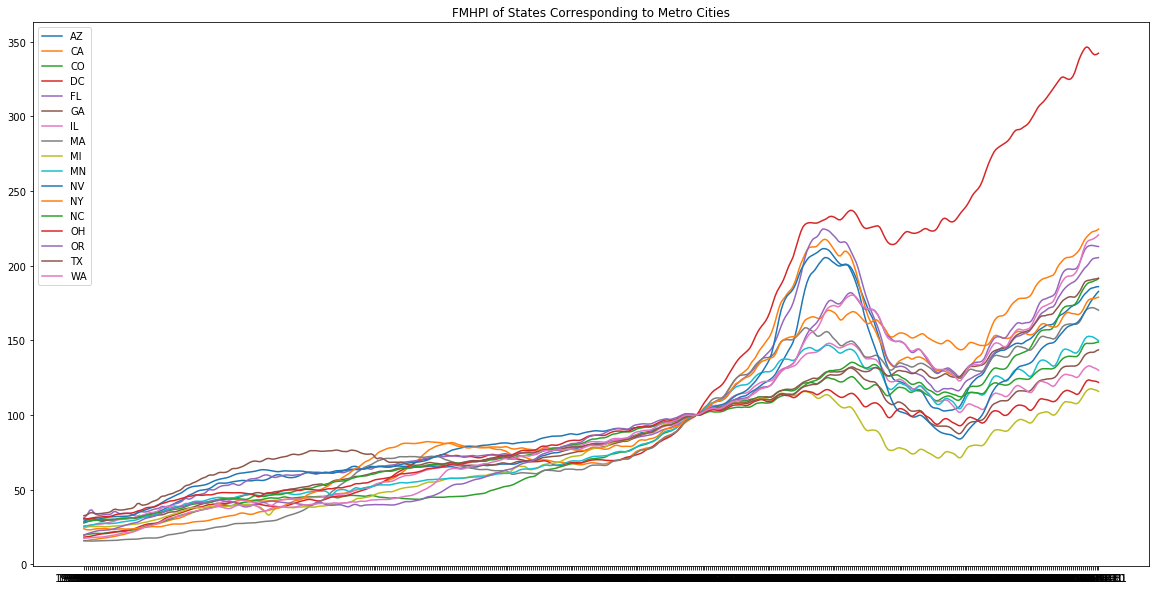

In [94]:
plt.figure(figsize=(20,10))
plt.plot(FMHPI.loc[:, states_abbrev])
plt.title('FMHPI of States Corresponding to Metro Cities')
plt.legend(states_abbrev)
plt.show()

### Part 2

●	Case-Shiller indices published by St Louis FRED have top 20 Metro data. Few of these indices go back beyond 1988. Note that the Case-Schiller is a price-return index so it is a good reflection of price changes, not the actual price levels. Are the Case-Schiller indices deseasonalized? Take a look at the methodology highlights here.

### The data is downloaded from https://fred.stlouisfed.org/series/SPCS20RSA. We examine the Case-Schiller index methodology from https://us.spindices.com/documents/methodologies/methodology-sp-corelogic-cs-home-price-indices.pdf and find out the component metropolitan areas of its S&P/Case-Shiller 20-City Composite Home Price Index. We then download data(Seasonally Adjusted) of those cities and merge them together.

In [493]:
Case_Shiller = pd.read_csv("/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ Case_Shiller/Case_Shiller.csv", dtype={'Date': str}, index_col = 0)
Case_Shiller = Case_Shiller.rename(columns = {'CSUSHPISA_20181127' : 'Nation',
                                              'ATXRSA_20181127' : 'Atlanta_GA',
                                              'BOXRSA_20181127' : 'Boston_MA',
                                              'CEXRSA_20181127' : 'Cleveland_OH',
                                              'CHXRSA_20181127' : 'Chicago_IL',
                                              'CRXRSA_20181127' : 'Charlotte_NC',
                                              'DAXRSA_20181127' : 'Dallas_TX',
                                              'DEXRSA_20181127' : 'Detroit_MI',
                                              'DNXRSA_20181127' : 'Denver_CO',
                                              'LVXRSA_20181127' : 'Las Vegas_NV',
                                              'LXXRSA_20181127' : 'Los Angelos_CA',
                                              'MIXRSA_20181127' : 'Miami_FL',
                                              'MNXRSA_20181127' : 'Minneapolis_MN',
                                              'NYXRSA_20181127' : 'New York_NY',
                                              'PHXRSA_20181127' : 'Phoenix_AZ',
                                              'POXRSA_20181127' : 'Portland_OR',
                                              'SDXRSA_20181127' : 'San Diego_CA',
                                              'SEXRSA_20181127' : 'Seattle_WA',
                                              'SFXRSA_20181127' : 'San Francisco_CA',
                                              'SPCS20RSA_20181127' : '20-City Composite',
                                              'TPXRSA_20181127' : 'Tampa_FL',
                                              'WDXRSA_20181127' : 'Washington_DC'})
Case_Shiller.index.names = ['Date']
Case_Shiller

,Atlanta_GA,Boston_MA,Cleveland_OH,Chicago_IL,Charlotte_NC,Nation,Dallas_TX,Detroit_MI,Denver_CO,Las Vegas_NV,...,Minneapolis_MN,New York_NY,Phoenix_AZ,Portland_OR,San Diego_CA,Seattle_WA,San Francisco_CA,20-City Composite,Tampa_FL,Washington_DC
Date,,,,,,,,,,,,,,,,,,,,,
1/1/70,100.000000,NaN,NaN,100.000000,NaN,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
2/1/70,100.000000,NaN,NaN,100.000000,NaN,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
3/1/70,100.000000,NaN,NaN,100.000000,NaN,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
4/1/70,101.887800,NaN,NaN,104.672170,NaN,NaN,105.694920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.597890,NaN,NaN,NaN
5/1/70,101.887800,NaN,NaN,104.672170,NaN,NaN,105.694920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.597890,NaN,NaN,NaN
6/1/70,101.887800,NaN,NaN,104.672170,NaN,NaN,105.694920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.597890,NaN,NaN,NaN
7/1/70,99.119440,NaN,NaN,106.997190,NaN,NaN,108.773670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.489140,NaN,NaN,NaN
8/1/70,99.119440,NaN,NaN,106.997190,NaN,NaN,108.773670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.489140,NaN,NaN,NaN
9/1/70,99.119440,NaN,NaN,106.997190,NaN,NaN,108.773670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.489140,NaN,NaN,NaN


In [494]:
Case_Shiller.info()

<class 'pandas.core.frame.DataFrame'>
Index: 585 entries, 1/1/70 to 9/1/18
Data columns (total 22 columns):
Atlanta_GA           537 non-null float64
Boston_MA            381 non-null float64
Cleveland_OH         381 non-null float64
Chicago_IL           585 non-null float64
Charlotte_NC         381 non-null float64
Nation               381 non-null float64
Dallas_TX            429 non-null float64
Detroit_MI           333 non-null float64
Denver_CO            381 non-null float64
Las Vegas_NV         381 non-null float64
Los Angelos_CA       381 non-null float64
Miami_FL             381 non-null float64
Minneapolis_MN       357 non-null float64
New York_NY          381 non-null float64
Phoenix_AZ           357 non-null float64
Portland_OR          381 non-null float64
San Diego_CA         381 non-null float64
Seattle_WA           345 non-null float64
San Francisco_CA     585 non-null float64
20-City Composite    225 non-null float64
Tampa_FL             381 non-null float64
Washington

In [495]:
print(Case_Shiller.dropna(how='any', axis=0).head()) 

        Atlanta_GA   Boston_MA  Cleveland_OH  Chicago_IL  Charlotte_NC  \
Date                                                                     
1/1/00  100.378206  100.919822    100.531377  100.564840    100.665133   
2/1/00  101.289722  101.894222    100.509033  101.411386    101.103257   
3/1/00  101.675542  102.651016    101.166614  102.427760    101.135671   
4/1/00  102.703145  104.347638    101.738233  103.411192    102.271217   
5/1/00  103.267302  106.009517    102.158956  104.391108    102.243820   

         Nation   Dallas_TX  Detroit_MI   Denver_CO  Las Vegas_NV  \
Date                                                                
1/1/00  100.556  100.713356  100.145625  100.663014    100.401379   
2/1/00  101.341  103.037315  100.876063  101.652547    100.904482   
3/1/00  102.127  102.709027  101.374340  102.735591    101.437483   
4/1/00  102.923  103.276754  101.764303  103.543432    101.595701   
5/1/00  103.679  103.715392  102.578367  105.302250    102.046929  

In [496]:
print(Case_Shiller.dropna(how='any', axis=0).tail()) 

        Atlanta_GA   Boston_MA  Cleveland_OH  Chicago_IL  Charlotte_NC  \
Date                                                                     
5/1/18  144.908860  213.418471    120.494322  142.526503    155.820875   
6/1/18  145.136402  213.949934    120.530733  142.417384    156.228237   
7/1/18  145.630367  213.440178    121.842277  142.140931    156.762642   
8/1/18  145.844628  213.775063    122.612120  142.456666    157.348059   
9/1/18  146.988965  214.361168    123.103383  143.119413    158.176606   

         Nation   Dallas_TX  Detroit_MI   Denver_CO  Las Vegas_NV  \
Date                                                                
5/1/18  201.951  185.442471  122.315778  213.626706    180.389977   
6/1/18  202.565  185.633296  122.211078  214.121786    182.336138   
7/1/18  202.621  185.179183  122.197009  214.601866    184.541707   
8/1/18  203.748  185.706690  122.652065  215.099181    186.657971   
9/1/18  204.521  186.543716  123.377505  215.689314    188.299092  

### Part 3

●	In order to look at the effects of the 1970s inflation on real estate you will need longer time series. However, you can find Case-Schiller quarterly data since 1970 for Atlanta, Chicago, Dallas, Oakland in the classic Case-Schiller paper . It is in a PDF table format but you can simply copy and paste it in an Excel sheet. 

### Manually scrape down the data from https://www.nber.org/papers/w2393.pdf, and merge it with the previous Case-Schiller full table.

In [497]:
Case_Shiller

,Atlanta_GA,Boston_MA,Cleveland_OH,Chicago_IL,Charlotte_NC,Nation,Dallas_TX,Detroit_MI,Denver_CO,Las Vegas_NV,...,Minneapolis_MN,New York_NY,Phoenix_AZ,Portland_OR,San Diego_CA,Seattle_WA,San Francisco_CA,20-City Composite,Tampa_FL,Washington_DC
Date,,,,,,,,,,,,,,,,,,,,,
1/1/70,100.000000,NaN,NaN,100.000000,NaN,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
2/1/70,100.000000,NaN,NaN,100.000000,NaN,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
3/1/70,100.000000,NaN,NaN,100.000000,NaN,NaN,100.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN
4/1/70,101.887800,NaN,NaN,104.672170,NaN,NaN,105.694920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.597890,NaN,NaN,NaN
5/1/70,101.887800,NaN,NaN,104.672170,NaN,NaN,105.694920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.597890,NaN,NaN,NaN
6/1/70,101.887800,NaN,NaN,104.672170,NaN,NaN,105.694920,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,99.597890,NaN,NaN,NaN
7/1/70,99.119440,NaN,NaN,106.997190,NaN,NaN,108.773670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.489140,NaN,NaN,NaN
8/1/70,99.119440,NaN,NaN,106.997190,NaN,NaN,108.773670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.489140,NaN,NaN,NaN
9/1/70,99.119440,NaN,NaN,106.997190,NaN,NaN,108.773670,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98.489140,NaN,NaN,NaN


### Part 4

●	For economic and demographic data at state level, you can use the same sources as those for the county level data below.

### (1) Residence Population

In [205]:
pop = pd.read_csv('/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ Residence Population/Residence Population.csv', dtype={'Date': str}, index_col = 0)
pop.index.names = ['Date']

In [206]:
string = "POP_20180118"
pop_state = []
for i in range(len(states_abbrev)):
    pop_state.append(str(states_abbrev[i] + string))
pop = pop[pop_state]
pop.head()

,AZPOP_20180118,CAPOP_20180118,COPOP_20180118,DCPOP_20180118,FLPOP_20180118,GAPOP_20180118,ILPOP_20180118,MAPOP_20180118,MIPOP_20180118,MNPOP_20180118,NVPOP_20180118,NYPOP_20180118,NCPOP_20180118,OHPOP_20180118,ORPOP_20180118,TXPOP_20180118,WAPOP_20180118
Date,,,,,,,,,,,,,,,,,
1900-01-01,124.0,1490.0,543.0,278.0,530.0,2220.0,4828.0,2788.0,2423.0,1754.0,43.0,7283.0,1897.0,4161.0,415.0,3055.0,523.0
1901-01-01,131.0,1550.0,581.0,285.0,544.0,2263.0,4914.0,2794.0,2450.0,1805.0,45.0,7449.0,1926.0,4216.0,434.0,3132.0,583.0
1902-01-01,138.0,1623.0,621.0,290.0,565.0,2305.0,4992.0,2856.0,2477.0,1862.0,49.0,7612.0,1956.0,4322.0,454.0,3210.0,651.0
1903-01-01,144.0,1702.0,652.0,295.0,587.0,2346.0,5071.0,2924.0,2505.0,1901.0,52.0,7771.0,1986.0,4386.0,479.0,3291.0,719.0
1904-01-01,151.0,1792.0,659.0,302.0,599.0,2387.0,5161.0,2969.0,2534.0,1945.0,56.0,7927.0,2017.0,4458.0,504.0,3374.0,782.0


### (2) State by state crime data

In [527]:
crime = pd.read_csv("/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ Crime rate/CrimeStatebyState.csv", sep=',', skiprows = 5, header = None)
crime.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,NaN,NaN,National or state crime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Violent crime,NaN,NaN,NaN,NaN,NaN,Property crime,NaN,...,NaN,NaN,NaN,NaN,Property crime,NaN,NaN,NaN,NaN,NaN
2,Year,Population,Violent crime total,Murder and nonnegligent Manslaughter,Legacy rape /1,Revised rape /2,Robbery,Aggravated assault,Property crime total,Burglary,...,Legacy rape rate /1,Revised rape rate /2,Robbery rate,Aggravated assault rate,Property crime rate,Burglary rate,Larceny-theft rate,Motor vehicle theft rate,NaN,NaN
3,1960,1302161,2704,78,209,NaN,706,1711,36539,8926,...,16.1,NaN,54.2,131.4,2806.0,685.5,1782.2,338.4,NaN,NaN
4,1961,1391000,2288,84,200,NaN,786,1218,41304,10262,...,14.4,NaN,56.5,87.6,2969.4,737.7,1876.3,355.4,NaN,NaN


In [528]:
sep = ((crime[0].str.find('Estimated crime in') != -1) & (~pd.isna(crime[0])))
part = sep.cumsum()
gb = crime[~sep].groupby(part)
keys = gb.groups.keys()

In [529]:
crime_state_dict = crime[0][sep].str.replace('Estimated crime in ', '')
crime_state_dict

58               California
117                Colorado
176    District of Columbia
235                 Florida
294                 Georgia
353                Illinois
412           Massachusetts
471                Michigan
530               Minnesota
589                  Nevada
648                New York
702          North Carolina
761                    Ohio
820                  Oregon
879                   Texas
938              Washington
Name: 0, dtype: object

In [533]:
AZ_crime= pd.read_csv("/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ Crime rate/Arizona_State_Crime.csv")
AZ_crime['State'] = "Arizona"
AZ_crime = AZ_crime[['Year','State','Population', 'Violent crime total', 'Property crime total', 'Violent Crime rate', 'Property crime rate']]
AZ_crime.head()

,Year,State,Population,Violent crime total,Property crime total,Violent Crime rate,Property crime rate
0,1960,Arizona,1302161,2704,36539,207.7,2806.0
1,1961,Arizona,1391000,2288,41304,164.5,2969.4
2,1962,Arizona,1509000,2610,45694,173.0,3028.1
3,1963,Arizona,1559000,3027,49894,194.2,3200.4
4,1964,Arizona,1581000,3368,54264,213.0,3432.3


In [536]:
dfs = []
for g in keys:
    dfs.append(gb.get_group(g))
    
crime_df = []
crime_df.append(AZ_crime)
for (state,df) in zip(crime_state_dict,dfs):
    dframe = df.reset_index().drop(columns = 'index')
    dframe.columns = df.iloc[2].values
    dframe = dframe.drop(range(0,3))
    dframe['State'] = state
    dframe = dframe[['Year','State','Population', 'Violent crime total', 'Property crime total', 'Violent Crime rate', 'Property crime rate']]
    dframe = dframe.dropna()
    dframe = dframe.astype({"Year": int, "Violent crime total": int, "Property crime total" : int, "Violent Crime rate" : float, "Property crime rate" : float})
    crime_df.append(dframe)

In [537]:
crime_df[0]

,Year,State,Population,Violent crime total,Property crime total,Violent Crime rate,Property crime rate
0,1960,Arizona,1302161,2704,36539,207.7,2806.0
1,1961,Arizona,1391000,2288,41304,164.5,2969.4
2,1962,Arizona,1509000,2610,45694,173.0,3028.1
3,1963,Arizona,1559000,3027,49894,194.2,3200.4
4,1964,Arizona,1581000,3368,54264,213.0,3432.3
5,1965,Arizona,1608000,3092,53957,192.3,3355.5
6,1966,Arizona,1618000,3272,63645,202.2,3933.6
7,1967,Arizona,1634000,3892,75160,238.2,4599.8
8,1968,Arizona,1670000,4402,77001,263.6,4610.8
9,1969,Arizona,1693000,5742,82710,339.2,4885.4


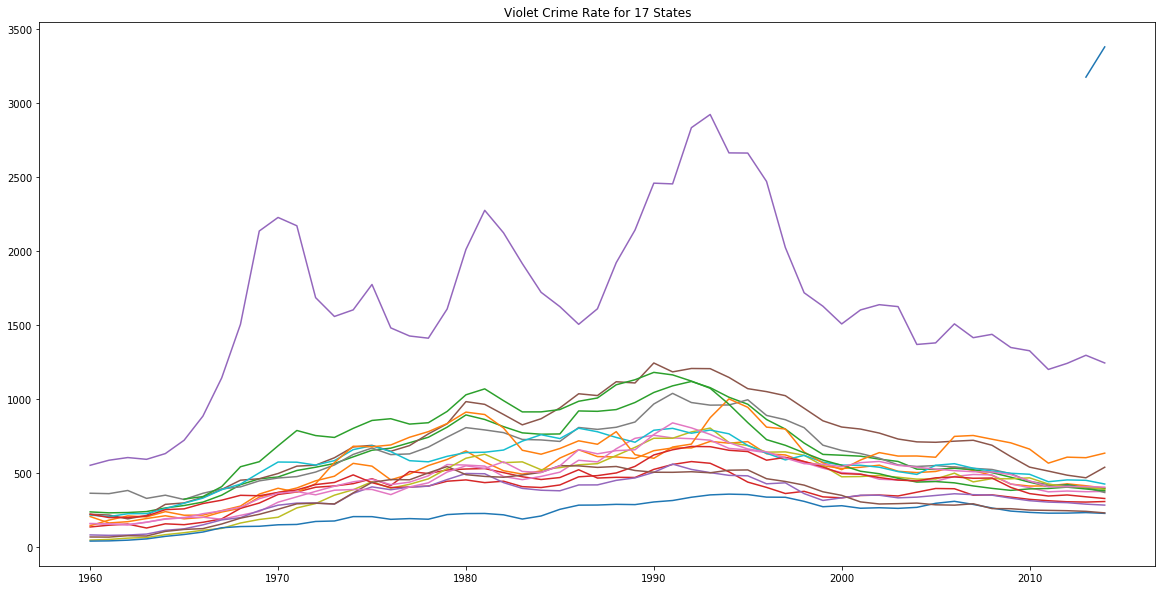

In [125]:
plt.figure(figsize=(20,10))
for i in range(len(crime_df)):
    plt.plot(crime_df[i].iloc[:,0], crime_df[i].iloc[:,5])
plt.title('Violet Crime Rate for 17 States')
plt.show()

### (3) Homeownership Rate

In [209]:
homeownership = pd.read_csv('/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ Homeownership Rate/Homeownership Rate.csv', dtype={'Date': str}, index_col = 0)
homeownership.index.names = ['Date']
string = "HOWN_20180227"
homeownership_state = []
for i in range(len(states_abbrev)):
    homeownership_state.append(str(states_abbrev[i] + string))
homeownership = homeownership[homeownership_state]
homeownership.head()

,AZHOWN_20180227,CAHOWN_20180227,COHOWN_20180227,DCHOWN_20180227,FLHOWN_20180227,GAHOWN_20180227,ILHOWN_20180227,MAHOWN_20180227,MIHOWN_20180227,MNHOWN_20180227,NVHOWN_20180227,NYHOWN_20180227,NCHOWN_20180227,OHHOWN_20180227,ORHOWN_20180227,TXHOWN_20180227,WAHOWN_20180227
Date,,,,,,,,,,,,,,,,,
1984-01-01,65.2,53.7,64.7,37.3,66.5,63.6,62.4,61.7,72.7,72.6,58.9,51.1,68.8,67.7,61.9,62.5,65.7
1985-01-01,64.7,54.2,63.6,37.4,67.2,62.7,60.6,60.5,70.7,70.0,57.0,50.3,68.0,67.9,61.5,60.5,66.8
1986-01-01,62.5,53.8,63.7,34.6,66.5,62.4,60.9,60.3,70.9,68.0,54.5,51.3,68.2,68.2,63.9,61.0,65.1
1987-01-01,63.3,54.3,61.8,35.8,66.3,63.9,61.0,60.6,71.7,68.9,54.1,52.0,68.4,68.6,64.6,61.1,64.4
1988-01-01,66.1,54.4,60.1,37.5,64.9,64.8,61.4,60.0,72.5,69.1,54.3,50.7,68.3,69.6,64.0,59.9,64.2


### (4) All-transaction House Price Index

In [211]:
AHPI = pd.read_csv('/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/All-transaction House Price Index/All_transaction_House_Price_Index.csv', dtype={'Date': str}, index_col = 0)
AHPI.index.names = ['Date']
string = "STHPI_20181127"
AHPI_state = []
for i in range(len(states_abbrev)):
    AHPI_state.append(str(states_abbrev[i] + string))
AHPI = AHPI[AHPI_state]
AHPI.head()

,AZSTHPI_20181127,CASTHPI_20181127,COSTHPI_20181127,DCSTHPI_20181127,FLSTHPI_20181127,GASTHPI_20181127,ILSTHPI_20181127,MASTHPI_20181127,MISTHPI_20181127,MNSTHPI_20181127,NVSTHPI_20181127,NYSTHPI_20181127,NCSTHPI_20181127,OHSTHPI_20181127,ORSTHPI_20181127,TXSTHPI_20181127,WASTHPI_20181127
Date,,,,,,,,,,,,,,,,,
1975-01-01,58.81,41.63,54.32,45.07,66.31,74.18,66.38,68.02,60.08,55.07,29.36,78.35,66.12,65.01,50.79,55.38,46.02
1975-04-01,61.33,42.76,54.22,47.12,83.97,71.80,62.77,66.04,62.32,55.06,46.79,75.67,67.06,64.66,51.23,58.56,47.13
1975-07-01,59.02,44.25,54.50,47.41,67.32,74.51,63.99,67.38,63.42,57.81,51.42,77.63,68.58,64.16,54.06,56.52,49.31
1975-10-01,55.03,45.85,55.17,54.06,68.66,73.67,66.48,70.57,62.15,59.82,55.32,80.05,70.79,65.65,52.89,59.68,47.86
1976-01-01,58.03,47.75,54.73,51.51,68.48,71.37,67.53,68.17,62.98,62.21,55.52,73.47,69.61,66.24,56.99,59.15,50.22


In [243]:
data_yearly = []
for col in AHPI.columns:
    avg = []
    for i in range(43):
        avg.append(np.mean(AHPI[col][i*4:i*4+4]))
    avg.append(np.mean(AHPI[col][43*4:43*4+3]))
    data_yearly.append(avg)

In [594]:
year = datetime.datetime.today().year
d = {'Date': np.arange(year - 43, year + 1, 1)}
for i in range(len(data_yearly)):
    d.update({AHPI.columns[i+1]: data_yearly[i]})
AHPI = pd.DataFrame(data = d)
AHPI = AHPI.set_index('Date')
AHPI.head()

,AZSTHPI_20181127,CASTHPI_20181127,COSTHPI_20181127,DCSTHPI_20181127,FLSTHPI_20181127,GASTHPI_20181127,ILSTHPI_20181127,MASTHPI_20181127,MISTHPI_20181127,MNSTHPI_20181127,NVSTHPI_20181127,NYSTHPI_20181127,NCSTHPI_20181127,OHSTHPI_20181127,ORSTHPI_20181127,TXSTHPI_20181127,WASTHPI_20181127
Date,,,,,,,,,,,,,,,,,
1975,58.5475,43.6225,54.5525,48.4150,71.5650,73.5400,64.9050,68.0025,61.9925,56.9400,45.7225,77.9250,68.1375,64.8700,52.2425,57.5350,47.5800
1976,60.6700,51.7525,59.0975,55.0250,71.3650,75.5900,71.1425,69.2700,64.2525,62.9375,58.5350,74.4600,70.1625,69.4975,59.3550,62.3600,54.3675
1977,65.4975,64.8775,68.1225,65.3400,74.8075,77.5850,83.8500,72.5750,69.7525,70.7700,67.0000,81.9875,76.7250,76.9175,72.0775,70.1275,65.1150
1978,76.5300,77.3500,82.1575,76.4250,82.8850,84.3100,97.6100,82.7700,81.1600,82.8475,82.3775,84.7025,85.0325,87.2850,86.1950,80.6675,81.1150
1979,93.4600,90.7125,96.0275,91.7475,93.6300,91.6425,99.8400,95.6725,96.5075,95.5175,97.1850,96.1575,93.7375,98.2975,97.5800,93.2600,94.1025


### (5) State Minimum Wage

In [277]:
min_wage = pd.read_csv('/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ State Minimum Wage/State_Minimum_Wage.csv', dtype={'Date': str}, index_col = 0)
min_wage.index.names = ['Date']
prefix = "STTMINWG"
endstr = "_20180101"
min_wage_state = []
for i in range(len(states_abbrev)):
    min_wage_state.append(str(prefix + states_abbrev[i] + endstr))
min_wage = min_wage[min_wage_state]
min_wage.head()

,STTMINWGAZ_20180101,STTMINWGCA_20180101,STTMINWGCO_20180101,STTMINWGDC_20180101,STTMINWGFL_20180101,STTMINWGGA_20180101,STTMINWGIL_20180101,STTMINWGMA_20180101,STTMINWGMI_20180101,STTMINWGMN_20180101,STTMINWGNV_20180101,STTMINWGNY_20180101,STTMINWGNC_20180101,STTMINWGOH_20180101,STTMINWGOR_20180101,STTMINWGTX_20180101,STTMINWGWA_20180101
Date,,,,,,,,,,,,,,,,,
1968-01-01,NaN,1.65,1.25,1.40,NaN,NaN,NaN,1.60,1.25,1.15,1.25,1.60,1.00,1.25,1.25,NaN,1.6
1969-01-01,NaN,1.65,1.25,1.40,NaN,NaN,NaN,1.60,1.25,1.15,1.25,1.60,1.00,1.25,1.25,NaN,1.6
1970-01-01,NaN,1.65,1.25,2.00,NaN,NaN,NaN,1.60,1.25,1.15,1.30,1.60,1.25,1.25,1.25,NaN,1.6
1971-01-01,NaN,1.65,1.25,2.00,NaN,NaN,NaN,1.60,1.25,1.15,1.30,1.60,1.25,1.25,1.25,NaN,1.6
1972-01-01,NaN,1.65,1.25,2.25,NaN,1.25,1.4,1.75,1.60,1.60,1.60,1.85,1.45,1.25,1.25,1.4,1.6


### (6) Real GDP

In [274]:
gdp = pd.read_csv('/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ Real GDP/Real_GDP.csv', dtype={'Date': str}, index_col = 0)
gdp.index.names = ['Date']
endstr = "RGSP_20181114"
gdp_state = []
for i in range(len(states_abbrev)):
    gdp_state.append(str(states_abbrev[i] + endstr))
gdp = gdp[gdp_state]
gdp.head()

,AZRGSP_20181114,CARGSP_20181114,CORGSP_20181114,DCRGSP_20181114,FLRGSP_20181114,GARGSP_20181114,ILRGSP_20181114,MARGSP_20181114,MIRGSP_20181114,MNRGSP_20181114,NVRGSP_20181114,NYRGSP_20181114,NCRGSP_20181114,OHRGSP_20181114,ORRGSP_20181114,TXRGSP_20181114,WARGSP_20181114
Date,,,,,,,,,,,,,,,,,
1997-01-01,168550.5,1378653.7,184192.9,79625.8,560887.8,328994.5,577803.7,302806.1,397339.2,211942.2,90367.6,976939.6,316366.3,471885.5,118539.2,872763.1,271601.3
1998-01-01,183138.4,1470393.0,201076.3,81189.9,590134.8,352712.9,595833.3,314880.2,406292.8,222970.6,94946.7,996663.2,326225.4,487904.2,124170.8,928374.4,289102.0
1999-01-01,198095.9,1582377.4,216300.2,84658.1,616625.2,377607.5,617314.9,331704.6,429356.2,230684.1,101276.5,1048059.2,344425.2,499060.3,126883.5,965676.6,310331.7
2000-01-01,207793.3,1709938.7,232752.0,85265.3,642692.9,393195.1,641749.2,359520.8,438277.0,245982.4,105343.7,1088004.8,354846.4,508991.7,137802.0,998296.5,312230.4
2001-01-01,212656.2,1702775.7,236382.6,88505.8,658640.0,396875.1,644181.3,362434.1,423623.6,246058.0,106656.8,1112238.7,361354.5,501815.4,136687.5,1021889.0,305054.8


### (7) Median Household Income - tax data

In [276]:
income = pd.read_csv('/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/ Median Household Income/Median_Household_Income.csv', dtype={'Date': str}, index_col = 0)
income.index.names = ['Date']
income.head()

,MEHOINUSAZA672N_20180912,MEHOINUSCAA646N_20180912,MEHOINUSCOA672N_20180912,MEHOINUSDCA672N_20180912,MEHOINUSFLA672N_20180912,MEHOINUSGAA672N_20180912,MEHOINUSILA672N_20180912,MEHOINUSMAA672N_20180912,MEHOINUSMIA672N_20180912,MEHOINUSMNA672N_20180912,MEHOINUSNCA672N_20180912,MEHOINUSNVA646N_20180912,MEHOINUSNYA672N_20180912,MEHOINUSOHA672N_20180912,MEHOINUSORA672N_20180912,MEHOINUSTXA672N_20180912,MEHOINUSWAA672N_20180912
Date,,,,,,,,,,,,,,,,,
1984-01-01,48280,25287,58141,45988,44584,45033,53524,60750,51750,55065,46351,25776,49636,52106,48221,51883,56374
1985-01-01,52019,26981,61398,45917,46499,45858,54183,61453,52814,51974,46734,23274,51501,54845,47699,51727,52287
1986-01-01,54600,29010,58222,52077,48923,52180,56764,64961,56966,56619,46808,26217,53583,53775,53043,51735,57557
1987-01-01,55369,30146,54804,56831,50691,55297,56063,66737,57342,58128,47112,26878,54614,53349,51828,51171,56549
1988-01-01,52811,30287,52370,53423,50756,53073,58983,66352,58879,58110,48776,27983,57766,55419,55435,49871,64582


### (8) Wage & Gross Income - tax data

In [616]:
states_ls_up = [ele.upper() for ele in states_ls]
cols = ['WAGES & SALARIES']
idx = [2,4,5,8,9,10,13,21,22,23,30,34,35,37,39,45,49]
wage_df = []
wd = '/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/Wage/tax_pkl/'
list_file = os.listdir(wd)[1:]
for file in list_file:
    df = pd.read_pickle(wd + file)
    #df = df[df['COUNTY CODE'] == '000']
    #df = df[(df['COUNTY'].isin(states_ls_up)) | (df['COUNTY'] == 'DistrictofColumbia')]
    df = df.iloc[idx,:]
    df = df.loc[:,cols]
    data = np.array(df)
    d = {'Date': file[:4]}
    for i in range(len(states_ls)):
        d.update({states_ls[i]: data[i]})
    df = pd.DataFrame(data = d)
    wage_df.append(df)
wage = pd.concat(wage_df)
wage = wage.set_index('Date')
wage.head()

,Arizona,California,Colorado,District of Columbia,Florida,Georgia,Illinois,Massachusetts,Michigan,Minnesota,Nevada,New York,North Carolina,Ohio,Oregon,Texas,Washington
Date,,,,,,,,,,,,,,,,,
1989,673040,107400,241690,849130,285090,117810,181830,73630,445530,347570,173590,99950,682050,6143600,631810,2641880,2718720
1990,742992,116680,255952,881873,277614,122318,195348,77216,468929,358503,184082,108121,724420,6464539,678620,2810832,2901041
1991,815574,119542,267595,912928,275244,125288,204221,79465,488278,376020,194098,108678,751098,6709850,702483,2953647,3071844
1992,898696,127309,287403,941036,296088,135659,208323,82867,523839,387755,209356,115998,807344,7068079,753023,3180554,3248575
1993,978579,133251,302190,960402,308596,144234,217145,85933,551207,393527,221828,120916,809178,7232834,783644,3232549,3331409


In [617]:
cols = ['ADJUSTED GROSS INCOME']
idx = [2,4,5,8,9,10,13,21,22,23,30,34,35,37,39,45,49]
gross_income_df = []
wd = '/Users/Violet/Desktop/MSMF 3rd Sem/ Data Science in Quantitative Finance/ LT project/Wage/tax_pkl/'
list_file = os.listdir(wd)[1:]
for file in list_file:
    df = pd.read_pickle(wd + file)
    #df = df[df['COUNTY CODE'] == '000']
    #df = df[(df['COUNTY'].isin(states_ls_up)) | (df['COUNTY'] == 'DistrictofColumbia')]
    df = df.iloc[idx,:]
    df = df.loc[:,cols]
    data = np.array(df)
    d = {'Date': file[:4]}
    for i in range(len(states_ls)):
        d.update({states_ls[i]: data[i]})
    df = pd.DataFrame(data = d)
    gross_income_df.append(df)
gross_income = pd.concat(gross_income_df)
gross_income = gross_income.set_index('Date')
gross_income

,Arizona,California,Colorado,District of Columbia,Florida,Georgia,Illinois,Massachusetts,Michigan,Minnesota,Nevada,New York,North Carolina,Ohio,Oregon,Texas,Washington
Date,,,,,,,,,,,,,,,,,
1989,957370,129680,294430,1060000,345710,148530,228320,93300,552080,420680,219510,129670,896230,7994300,840480,3266910,3504280
1990,1051627,139836,308987,1095290,340311,151785,245011,97234,589361,433392,229946,138971,934481,8333097,884742,3453425,3716636
1991,1136334,143977,319467,1136304,328543,154079,251418,99974,604280,443843,239748,141877,959185,8656950,911052,3660369,3895487
1992,1296617,153127,340808,1177575,347222,163174,265879,106704,633675,468129,260203,148488,1077118,8998931,976975,3934201,4144587
1993,1366036,158102,357941,1200811,359027,175249,281115,109009,671935,475844,277893,155088,1058642,9200508,1014620,3981830,4241258
1994,1510181,177476,392491,1266769,375840,184300,295680,115233,721204,483357,294983,163919,1106667,9706729,1074334,4072371,4402537
1995,1670158,187639,448526,1351552,413490,243945,316858,127221,774818,507179,346662,174207,1153098,9860242,1153196,4321278,4657152
1996,1849621,202891,502069,1423948,425923,238448,323285,133457,818145,520203,322384,179830,1199205,10326969,1133015,4524442,4843505
1997,1980215,213919,539214,1493235,439494,270655,326686,133977,874527,534084,332687,185352,1217616,10483703,1143845,4810772,4904262


### Part 5 Now we integrate all the datasets

### Use average to convert monthly data to yearly data.

### Because we have the Case Shiller data dated back to 1970 for Atlanta-GA, Chicago-IL, Dallas-TX and San Francisco, CA, we creat a different date range 1970-2018 for these 4 states.

In [408]:
#FMHPI
FMHPI = FMHPI.loc[:, states_abbrev]
FMHPI_yearly = []
for col in FMHPI.columns:
    avg = []
    for i in range(43):
        avg.append(np.mean(FMHPI[col][i*12:i*12+12]))
    df = pd.DataFrame({'Date': np.arange(year - 43, year, 1), 'FMHPI': avg})
    FMHPI_yearly.append(df)

In [410]:
FMHPI_yearly[0].head()

,Date,FMHPI
0,1975,181.630678
1,1976,168.122320
2,1977,156.691568
3,1978,147.223075
4,1979,137.582093


In [595]:
year = datetime.datetime.today().year
index = np.arange(year - 48, year + 1, 1)
state_combo = []
for i in range(len(states_abbrev)):
    df = pd.DataFrame({'Date': index, 'State': states_ls[i], 'State Abbrev': states_abbrev[i]})
    df = df.merge(FMHPI_yearly[i], left_on='Date', right_on='Date', how='left')
    state_combo.append(df)
len(state_combo)

17

In [498]:
#Case_Shiller
Case_Shiller = Case_Shiller.drop(['Nation','20-City Composite'], axis = 1)

In [596]:
Case_Shiller_yearly = []
for col in Case_Shiller.columns:
    avg = []
    for i in range(48):
        avg.append(np.nanmean(Case_Shiller[col][i*12:i*12+12]))
    avg.append(np.nanmean(Case_Shiller[col][48*12:48*12+9]))
    df = pd.DataFrame({'Date': np.arange(year - 48, year + 1, 1), col + '_Case_Shiller': avg})
    Case_Shiller_yearly.append(df)
Case_Shiller_yearly[0].head()

/Users/Violet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: Mean of empty slice
  """


,Date,Atlanta_GA_Case_Shiller
0,1970,102.913845
1,1971,111.580535
2,1972,119.377795
3,1973,131.120175
4,1974,143.342090


In [597]:
for i in range(len(states_abbrev)):
    for j in range(len(Case_Shiller_yearly)):
        if(Case_Shiller_yearly[j].columns[-1].split('_')[1] == states_abbrev[i]):
            state_combo[i] = state_combo[i].merge(Case_Shiller_yearly[j], left_on='Date', right_on='Date', how='left')

In [598]:
#Crime
for i in range(len(crime_df)):
    state_combo[i] = state_combo[i].merge(crime_df[i], left_on=['Date','State'], right_on=['Year','State'], how='left')
    state_combo[i] = state_combo[i].drop(columns = ['Year'])

In [599]:
#Pop
pop = pop.set_index(np.arange(year - 118, year, 1))
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = pop.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'Residence Pop'})

In [600]:
#Homeownership
homeownership = homeownership.set_index(np.arange(year - 34, year, 1))
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = homeownership.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'Homeownership Rate'})

In [601]:
#AHPI
AHPI = AHPI.set_index(np.arange(year - 43, year+1, 1))
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = AHPI.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'AHPI'})

In [606]:
#real GDP
gdp = gdp.set_index(np.arange(year - 21, year, 1))
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = gdp.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'Real GDP'})

In [613]:
#Income
income = income.set_index(np.arange(year - 34, year, 1))
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = income.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'Median Household Income'})

In [618]:
#wage
wage = wage.set_index(np.arange(year - 29, year-1, 1))
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = wage.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'Wage'})

In [621]:
#adjusted gross income
gross_income = gross_income.set_index(np.arange(year - 29, year-1, 1))
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = gross_income.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'Adjusted Gross Income'})

In [625]:
for i in range(len(state_combo)):
    state_combo[i] = state_combo[i].set_index('Date')

In [626]:
len(state_combo)

17

In [627]:
state_combo[1].head()

,State,State Abbrev,FMHPI,Los Angelos_CA_Case_Shiller,San Diego_CA_Case_Shiller,San Francisco_CA_Case_Shiller,Population,Violent crime total,Property crime total,Violent Crime rate,Property crime rate,Residence Pop,Homeownership Rate,AHPI,Real GDP,Median Household Income,Wage,Adjusted Gross Income
Date,,,,,,,,,,,,,,,,,,
1970,California,CA,NaN,NaN,NaN,101.336680,1772482,6564.0,98265.0,370.3,5543.9,19971.069,NaN,NaN,NaN,NaN,NaN,NaN
1971,California,CA,NaN,NaN,NaN,109.312357,1849000,7407.0,102451.0,400.6,5540.9,20345.939,NaN,NaN,NaN,NaN,NaN,NaN
1972,California,CA,NaN,NaN,NaN,117.177297,1945000,8731.0,106671.0,448.9,5484.4,20585.469,NaN,NaN,NaN,NaN,NaN,NaN
1973,California,CA,NaN,NaN,NaN,127.688740,2058000,9877.0,128089.0,479.9,6224.0,20868.728,NaN,NaN,NaN,NaN,NaN,NaN
1974,California,CA,NaN,NaN,NaN,143.171113,2153000,12202.0,164811.0,566.7,7654.9,21173.865,NaN,NaN,NaN,NaN,NaN,NaN


### Part 6 Extract Zillow Forecast ZHVI state data

In [638]:
ZHVI = pd.read_csv('State_Zhvi_AllHomes.csv')
cols = ['RegionID', 'RegionName', 'SizeRank']
ZHVI = ZHVI.set_index(cols).T
ZHVI.index = pd.to_datetime(ZHVI.index)
ZHVI.columns = ZHVI.columns.droplevel(['RegionID', 'SizeRank'])
ZHVI.index.name = 'Date'
ZHVI.head()

RegionName,California,Texas,New York,Florida,Illinois,Pennsylvania,Ohio,Michigan,Georgia,North Carolina,...,New Hampshire,Rhode Island,Montana,Delaware,South Dakota,Alaska,North Dakota,Vermont,District of Columbia,Wyoming
Date,,,,,,,,,,,,,,,,,,,,,
1996-04-01,163000.0,92800.0,124200.0,84600.0,115100.0,77500.0,82900.0,76600.0,87000.0,88100.0,...,99700.0,115800.0,134400.0,104100.0,40600.0,117800.0,NaN,90800.0,114000.0,127600.0
1996-05-01,162700.0,92800.0,123900.0,84600.0,115700.0,77300.0,83100.0,77100.0,87400.0,88000.0,...,99600.0,115700.0,134400.0,104900.0,40800.0,118500.0,NaN,90100.0,113500.0,127700.0
1996-06-01,162300.0,93000.0,123700.0,84600.0,116100.0,77100.0,83300.0,77600.0,87900.0,88000.0,...,99600.0,115700.0,134400.0,105700.0,41100.0,119400.0,NaN,89300.0,113100.0,127700.0
1996-07-01,162000.0,93200.0,123400.0,84600.0,116300.0,76900.0,83600.0,78200.0,88400.0,88100.0,...,99700.0,115600.0,134500.0,106400.0,41600.0,120500.0,NaN,88600.0,112800.0,127700.0
1996-08-01,161800.0,93300.0,123200.0,84600.0,116200.0,76800.0,84000.0,78700.0,89000.0,88400.0,...,99900.0,115600.0,134500.0,107000.0,42300.0,121700.0,NaN,87900.0,112600.0,127600.0


In [642]:
ZHVI_yearly = ZHVI.resample('1Y').last()
ZHVI_yearly.index = ZHVI_yearly.index.year
ZHVI_yearly = ZHVI_yearly.loc[:,states_ls]
for i in range(len(states_abbrev)):
    df = pd.DataFrame(data = ZHVI_yearly.iloc[:,i]).rename_axis('Date')
    state_combo[i] = state_combo[i].merge(df, left_on='Date', right_on='Date', how='left')
    state_combo[i] = state_combo[i].rename(columns = {state_combo[i].columns[-1]: 'ZHVI'})

In [643]:
state_combo[1].head()

,State,State Abbrev,FMHPI,Los Angelos_CA_Case_Shiller,San Diego_CA_Case_Shiller,San Francisco_CA_Case_Shiller,Population,Violent crime total,Property crime total,Violent Crime rate,Property crime rate,Residence Pop,Homeownership Rate,AHPI,Real GDP,Median Household Income,Wage,Adjusted Gross Income,ZHVI
Date,,,,,,,,,,,,,,,,,,,
1970,California,CA,NaN,NaN,NaN,101.336680,1772482,6564.0,98265.0,370.3,5543.9,19971.069,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971,California,CA,NaN,NaN,NaN,109.312357,1849000,7407.0,102451.0,400.6,5540.9,20345.939,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972,California,CA,NaN,NaN,NaN,117.177297,1945000,8731.0,106671.0,448.9,5484.4,20585.469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973,California,CA,NaN,NaN,NaN,127.688740,2058000,9877.0,128089.0,479.9,6224.0,20868.728,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974,California,CA,NaN,NaN,NaN,143.171113,2153000,12202.0,164811.0,566.7,7654.9,21173.865,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [645]:
for i in range(len(states_abbrev)):
    state_combo[i].to_pickle('state_combo_' + states_abbrev[i] + '.pkl')